In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# This data was featured in ML-I, but in Dataiku
# The target variable is "medv"
df = pd.read_excel('Boston.xlsx')

In [30]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [31]:
df.shape

(506, 13)

In [32]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
lstat      float64
medv       float64
dtype: object

## Initial data manipulation and exploration

In [33]:
# Plot the histograms of all the features
# your code below...


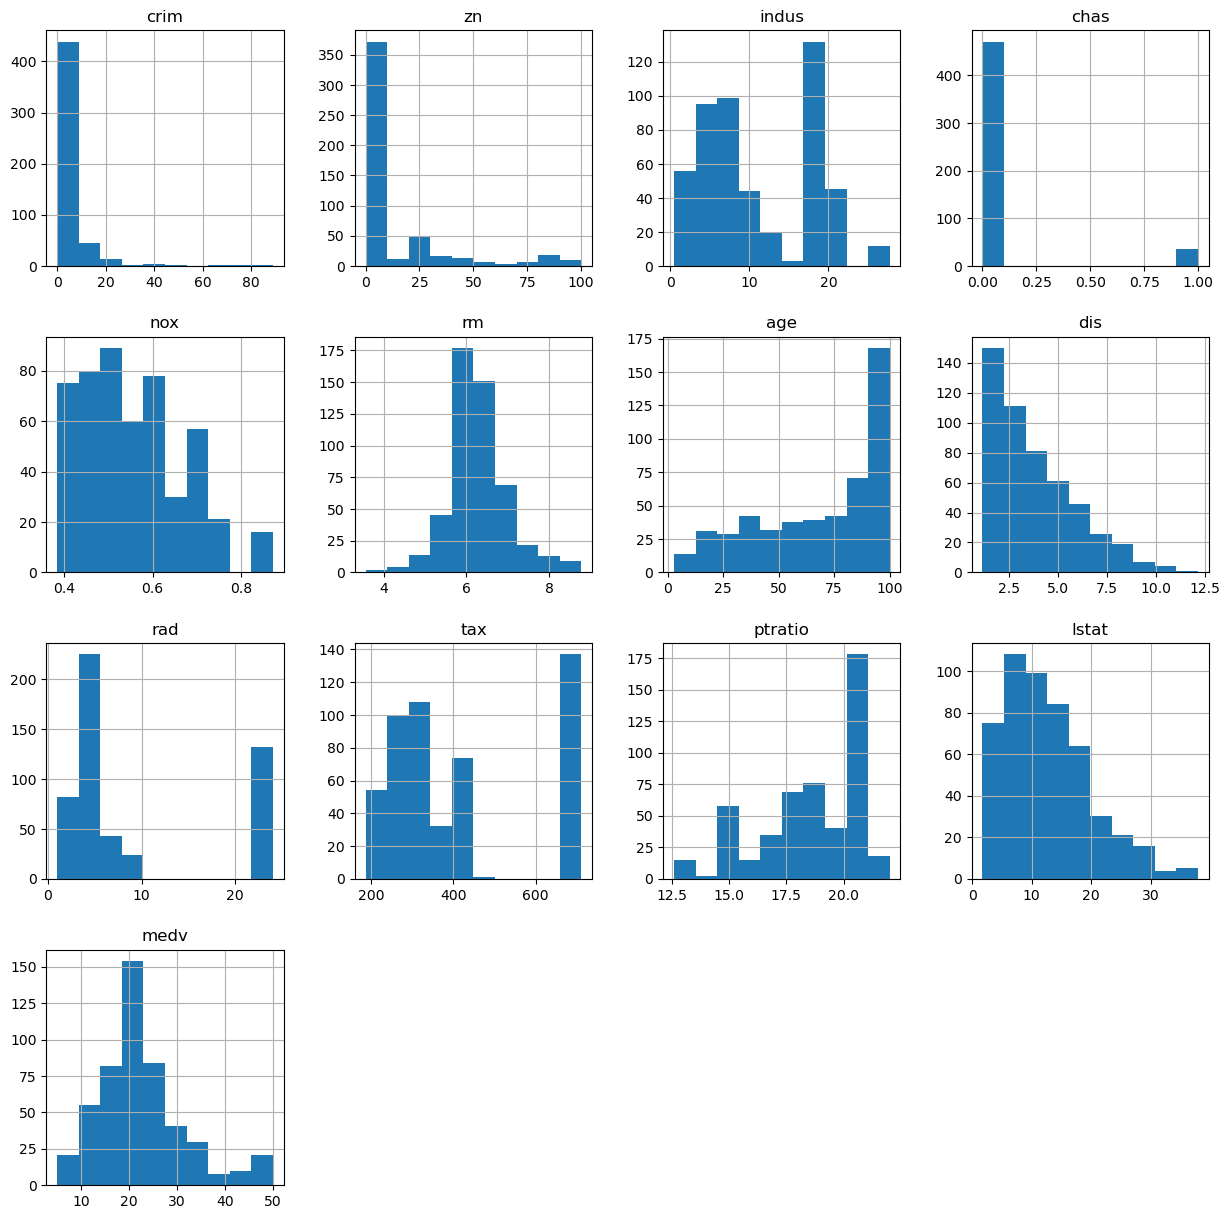

In [34]:
histograms = df.hist(figsize=(15,15))

In [35]:
# There are no missing values, but some histograms seem either bimodal, or skewed, or both.
# For this exercise, we will bucketize (bin) the features indus, rad and tax only.  The number of buckets for each
# of these variables will be 20, and the bucketization will be using regularly spaced intervals
# (hint: use pd.cut, specifying the number of bins as 20).
# You can do the bucketization in-place, or a new dataframe, up to you.
#
# you code below...


In [36]:
# Step 1: Create bins for 'indus', 'rad', 'tax'
df['indus'] = pd.cut(df['indus'], bins=20)
df['rad'] = pd.cut(df['rad'], bins=20)
df['tax'] = pd.cut(df['tax'], bins=20)

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,"(1.824, 3.188]",0,0.538,6.575,65.2,4.0900,"(0.977, 2.15]","(291.8, 318.0]",15.3,4.98,24.0
1,0.02731,0.0,"(5.916, 7.28]",0,0.469,6.421,78.9,4.9671,"(0.977, 2.15]","(239.4, 265.6]",17.8,9.14,21.6
2,0.02729,0.0,"(5.916, 7.28]",0,0.469,7.185,61.1,4.9671,"(0.977, 2.15]","(239.4, 265.6]",17.8,4.03,34.7
3,0.03237,0.0,"(1.824, 3.188]",0,0.458,6.998,45.8,6.0622,"(2.15, 3.3]","(213.2, 239.4]",18.7,2.94,33.4
4,0.06905,0.0,"(1.824, 3.188]",0,0.458,7.147,54.2,6.0622,"(2.15, 3.3]","(213.2, 239.4]",18.7,5.33,36.2


In [10]:
# dummy encode the new categoricals created in the last step for indus, rad, tax.
# You can do in-place, or copy, whatever you choose.
# your code below...

In [37]:
df_1 = df.copy()

df_1 = pd.get_dummies(df, columns=['indus', 'rad', 'tax'])

df_1.head()

,crim,zn,chas,nox,rm,age,dis,ptratio,lstat,medv,...,"tax_(449.0, 475.2]","tax_(475.2, 501.4]","tax_(501.4, 527.6]","tax_(527.6, 553.8]","tax_(553.8, 580.0]","tax_(580.0, 606.2]","tax_(606.2, 632.4]","tax_(632.4, 658.6]","tax_(658.6, 684.8]","tax_(684.8, 711.0]"
0,0.00632,18.0,0,0.538,6.575,65.2,4.0900,15.3,4.98,24.0,...,False,False,False,False,False,False,False,False,False,False
1,0.02731,0.0,0,0.469,6.421,78.9,4.9671,17.8,9.14,21.6,...,False,False,False,False,False,False,False,False,False,False
2,0.02729,0.0,0,0.469,7.185,61.1,4.9671,17.8,4.03,34.7,...,False,False,False,False,False,False,False,False,False,False
3,0.03237,0.0,0,0.458,6.998,45.8,6.0622,18.7,2.94,33.4,...,False,False,False,False,False,False,False,False,False,False
4,0.06905,0.0,0,0.458,7.147,54.2,6.0622,18.7,5.33,36.2,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# The last step may have created columns with all values 0 (corresponding to empty buckets).
# Drop all such columns, because they will cause problem when we standard scale below.
# In-place or copy, up to you.
#
# your code below...
#


In [38]:
# Step 3: Remove any all-zero columns resulting from the binned columns
df_2 = df_1.copy()
binned_columns = [col for col in df_2.columns if col.startswith(('indus', 'rad', 'tax'))]
df_2 = df_2.drop(df_2[binned_columns].columns[(df_2[binned_columns] == 0).all()], axis=1)

In [14]:
# At this point you should have all the original features without change, except for indus, rad and tax.
# indus,rad,tax should be one-hot encoded into at most 20 categories each, after removing empty
# buckets from the original 20 that were created in the bucketization.

In [15]:
# standard scale all the features, including the one-hot encoding columns. (Do not scale the target medv variable)
# It is recommended (but not mandatory) to do this after separating the dataframe to X (the features) and y (the target).
# In place or copy, up to you.
#
# your code below...
#


In [39]:
# Proceed with standard scaling of features (excluding 'medv')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = df_2.drop('medv', axis=1)
scaled_features = scaler.fit_transform(features)
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled['medv'] = df_2['medv']

In [22]:
# Split the data (both features and using labels, train_test_split (from sklearn), using random_state=200 and train_size=0.8
# Obtain train (80%) and test (20%) data.  No need for val set.
#
# Your code below
#


In [40]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X = df_scaled.drop('medv', axis=1)
y = df_scaled['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=200)

In [ ]:
# Run OLS (Ordinary Least Squares) using sklearn, and compute r2_score (R-squared) for both training and test.
# Enter the results in the appropriate location in the exam page on Blackboard,
# then submit it with this notebook attached.
#
# Your code below

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Run OLS using sklearn
model = LinearRegression()
model.fit(X_train, y_train)

# Predict for both training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute R-squared for both training and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the R-squared values
print(f'R-squared for Training Data: {r2_train}')
print(f'R-squared for Test Data: {r2_test}')


R-squared for Training Data: 0.7929510254381671
R-squared for Test Data: 0.6593454055300743


In [ ]:
# Good luck!